<a href="https://colab.research.google.com/github/alistairwgillespie/UNSW-NB15-Data-Products/blob/master/eda_hosts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long-tail Analysis of Host Features

# Setup

In [0]:
# Libraries
import pandas as pd
import numpy as np

# from scipy.stats import norm  
# from sklearn.preprocessing import StandardScaler
# from scipy import stats
# from scipy.stats import skew
# from scipy.stats.stats import pearsonr

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

# Data Ingestion

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
# Link to features table
features_link = 'https://drive.google.com/open?id=1BXqGehJktz4byjo_yxG0xL9GIHOU0qUZ'

# Read in features table data
fluff, id = features_link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sample_data.csv')  
features_df = pd.read_csv('sample_data.csv', encoding='iso-8859-1')

display(features_df)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [8]:
# Link to sample data
link = 'https://drive.google.com/open?id=1wgmX5978mx3-Vh6aN-Z6ML5LPNY0LOjv'

# Read in sample data
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sample_data.csv')  
df = pd.read_csv('sample_data.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


# Data Preprocessing

## Assign column names

In [9]:
# Assigned column headers using the features dataframe
df.columns = features_df['Name'].T
df.reset_index(drop=True, inplace=True)
df.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


## Quantitative vs. Qualitative 



In [0]:
# Distinguish quantitative vs. qualitative features
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

# Label Num variables
quantitative_df = pd.DataFrame(columns = ['variable'], data = quantitative)
quantitative_df['type'] = 'quantitative'

# Label Cat variables
qualitative_df = pd.DataFrame(columns = ['variable'], data = qualitative)
qualitative_df['type'] = 'qualitative'

print("quantitative variables: " + str(quantitative_df.shape[0]))
print("qualitative variables: " + str(qualitative_df.shape[0]))

# Explorative Data Analysis

In [0]:
# Describe the data
df.describe()

## Long tail analysis - Hosts

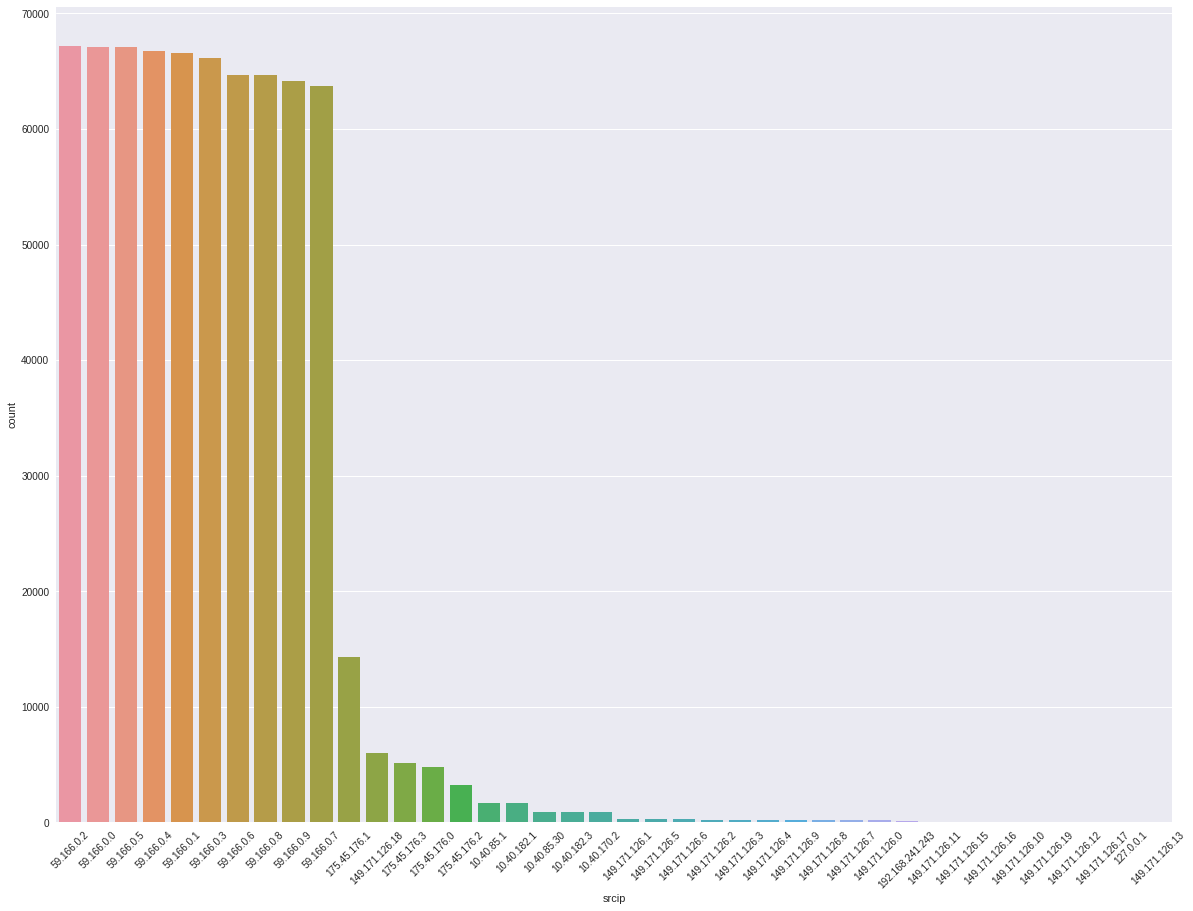

In [0]:
# Plot distribution per srcip
plt.figure(figsize=(20,15))
ax = sns.countplot(x="srcip", data=df, order = df['srcip'].value_counts().index)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [0]:
# Tail of SRC IP
df['srcip'].value_counts().tail()

149.171.126.19    3
149.171.126.12    2
149.171.126.17    1
127.0.0.1         1
149.171.126.13    1
Name: srcip, dtype: int64

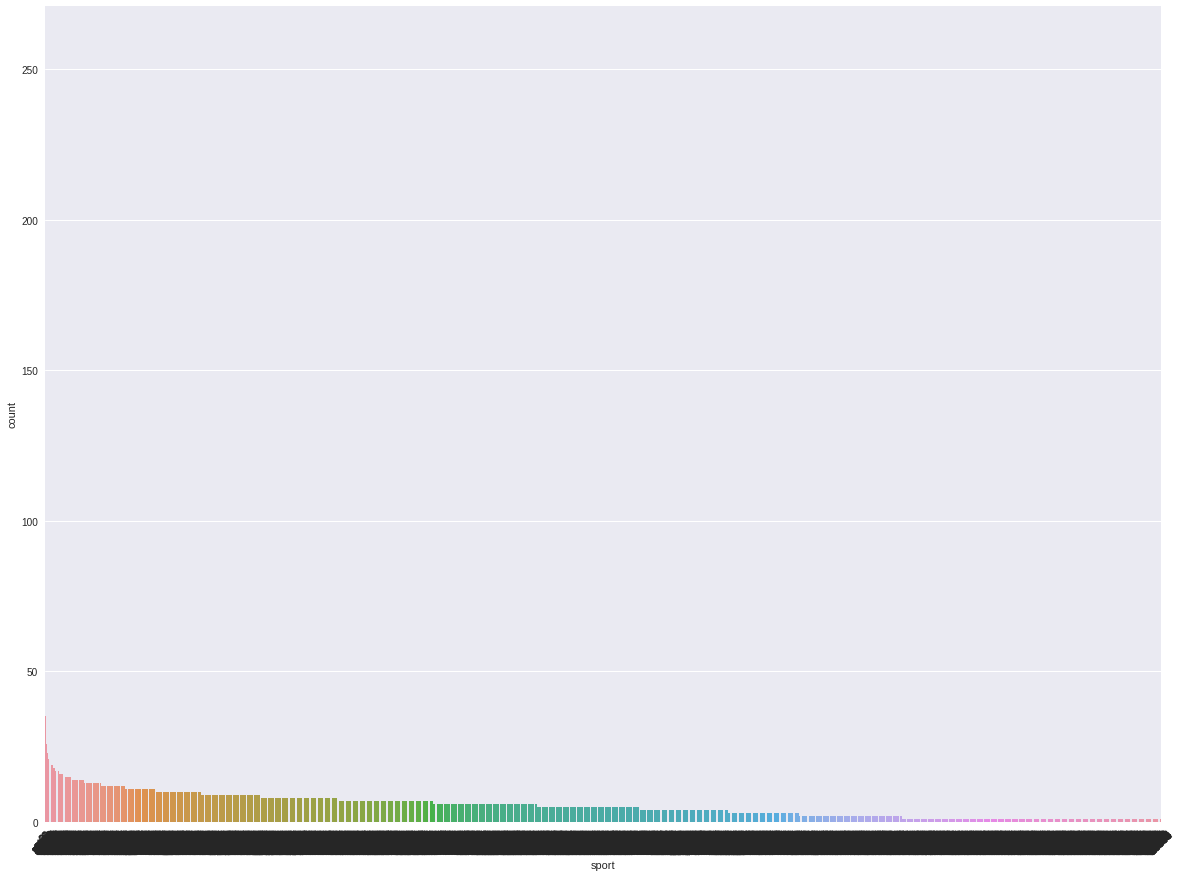

In [0]:
# Plot distribution per source port
plt.figure(figsize=(20,15))
tcp_df = df[df.proto =='tcp']
ax = sns.countplot(x="sport", data=tcp_df, order = tcp_df['sport'].value_counts().index)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [0]:
# Tail of source port
df['sport'].value_counts().tail()

52149    1
18186    1
4412     1
39707    1
26127    1
Name: sport, dtype: int64

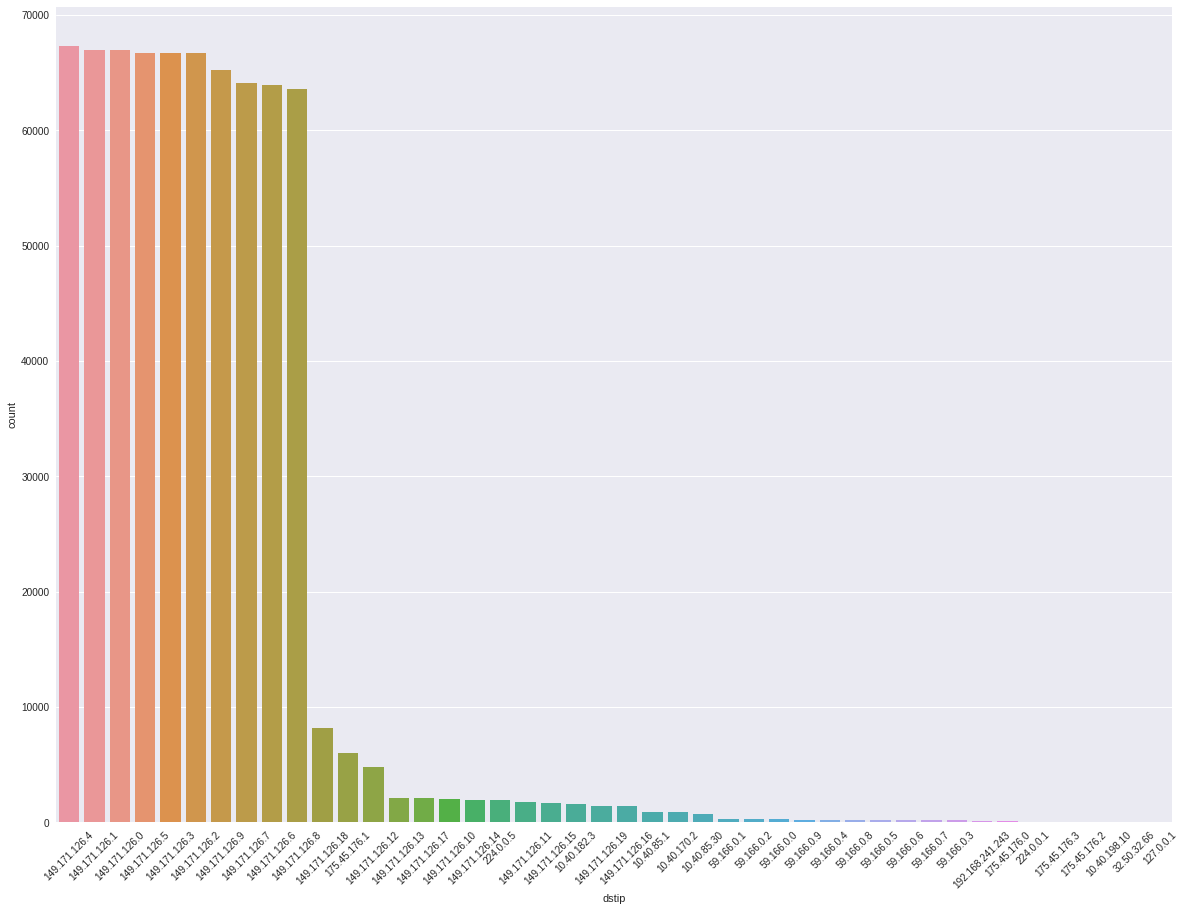

In [0]:
# Plot distribution per dstip
plt.figure(figsize=(20,15))
ax = sns.countplot(x="dstip", data=df, order = df['dstip'].value_counts().index)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [0]:
# Tail of destination IP
df['dstip'].value_counts().tail()

175.45.176.3    10
175.45.176.2    10
10.40.198.10     6
32.50.32.66      2
127.0.0.1        1
Name: dstip, dtype: int64

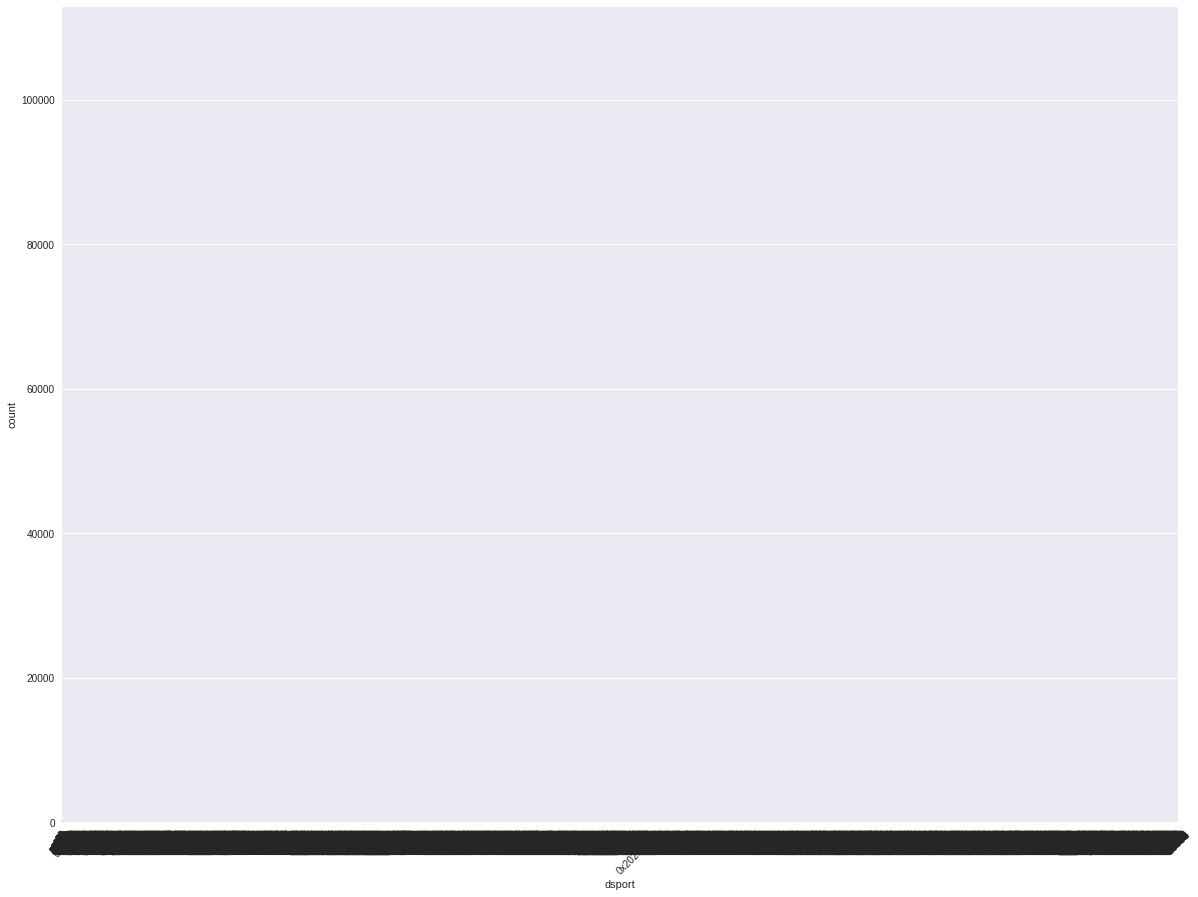

In [0]:
# Plot distribution per dest port
plt.figure(figsize=(20,15))
ax = sns.countplot(x="dsport", data=df, order = df['dsport'].value_counts().index)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [0]:
# Tail of dest port
df['dsport'].value_counts().tail()

48125    1
64262    1
53736    1
62699    1
3903     1
Name: dsport, dtype: int64

In [0]:
column_edge = 'dsport'
column_ID = 'ID'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN


In [0]:
df = df.assign(id=(df['dstip']).astype('category').cat.codes)

In [0]:
df['id'] = df.groupby(['dstip']).ngroup()

In [0]:
df[df.id == 22].head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,id
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,3,7,1,3,1,1,1,NaN,0,22
8,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,...,6,7,3,1,1,1,1,NaN,0,22
15,59.166.0.1,10393,149.171.126.6,44307,udp,CON,0.001749,528,304,31,...,8,2,3,5,1,1,2,NaN,0,22
18,59.166.0.1,8989,149.171.126.6,111,udp,CON,0.004898,568,312,31,...,8,2,3,5,2,1,2,NaN,0,22
26,59.166.0.9,5685,149.171.126.6,53,udp,CON,0.001141,146,178,31,...,5,7,1,1,1,1,1,NaN,0,22


In [0]:

# G=nx.from_pandas_dataframe(df, 'srcip', 'dstip', ['sbytes', 'dbytes'])

g = nx.from_pandas_edgelist(df, 'srcip', 'dstip', ['sbytes', 'dbytes'])



CPU times: user 3.53 s, sys: 29.1 ms, total: 3.56 s
Wall time: 3.56 s


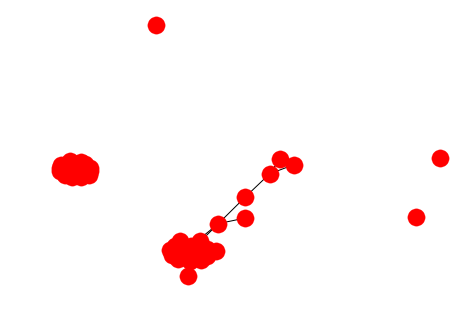

In [13]:
%%time

import networkx as nx

ip_nx = nx.from_pandas_edgelist(df, 'srcip', 'dstip', ['sbytes', 'dbytes'])
nx.draw(ip_nx)

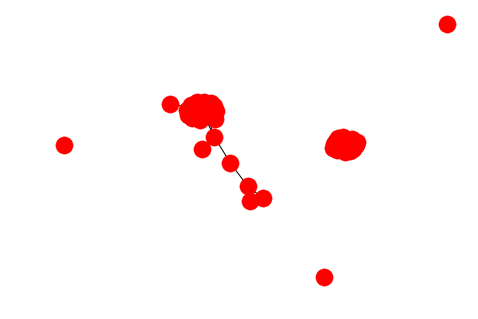

In [15]:
nx.draw(ip_nx,pos=nx.spring_layout(ip_nx)) 
plt.draw()  # pyplot draw()

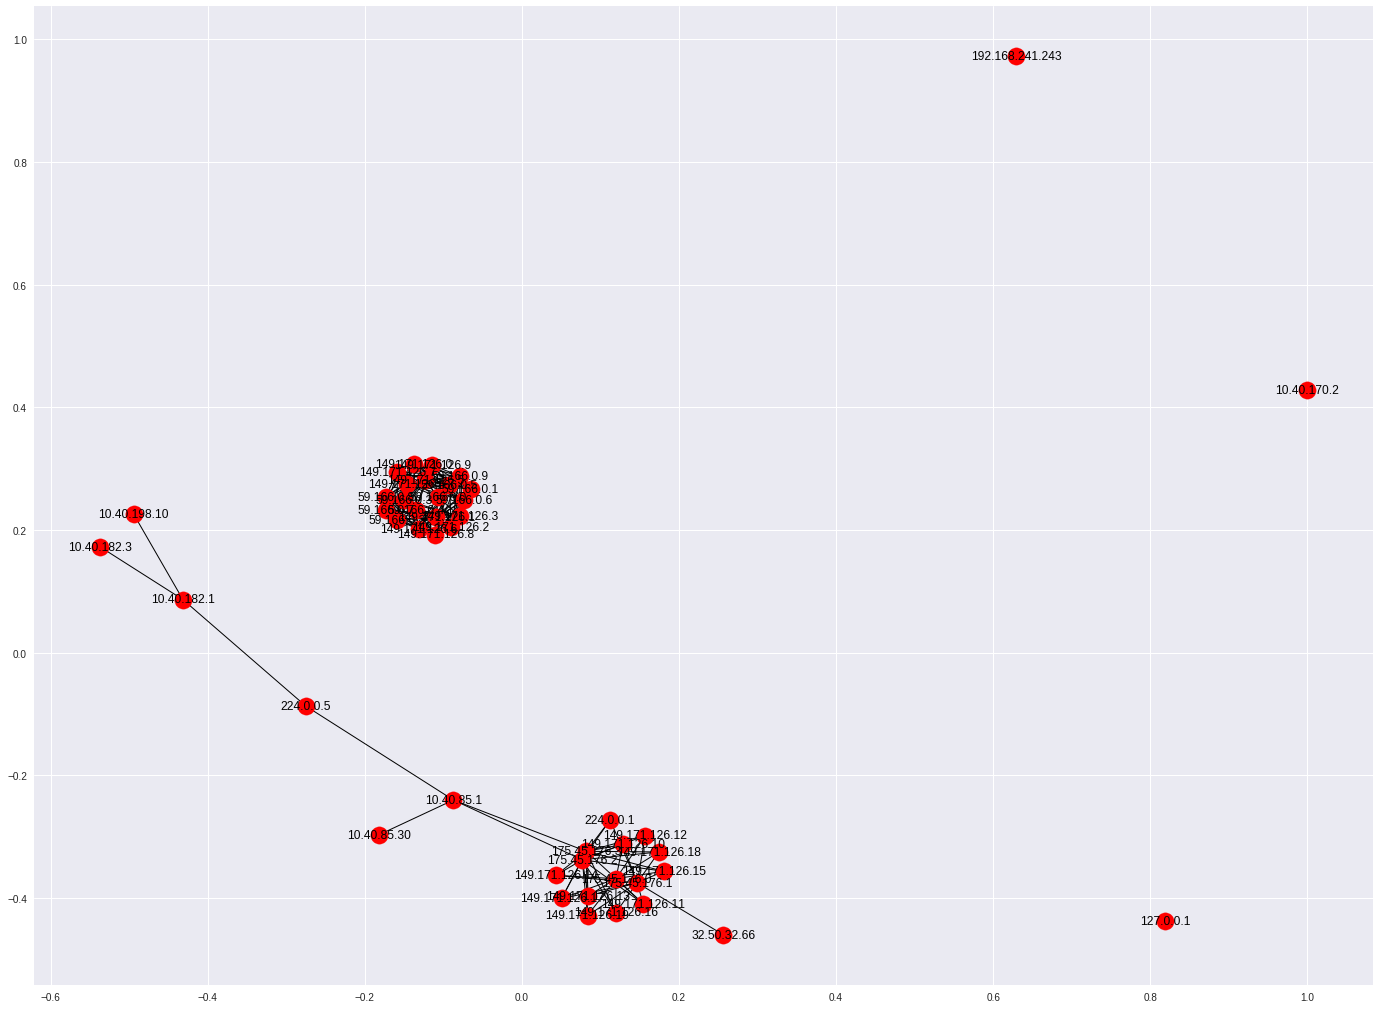

In [17]:
plt.figure(figsize = (24,18))

nx.draw_networkx(ip_nx)

In [4]:
traffic_df  = df['srcip', 'dstip'].groupby(['srcip', 'dstip']).agg(['count'])

NameError: ignored

In [18]:
df[df.srcip == '192.168.241.243']

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
221,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.0,1780,0,64,...,0,2,2,2,2,1,1,2,NaN,0
222,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.0,1780,0,64,...,0,2,2,2,2,1,1,2,NaN,0
2768,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.0,1424,0,64,...,0,2,2,2,2,1,1,2,NaN,0
2769,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.0,1424,0,64,...,0,2,2,2,2,1,1,2,NaN,0
4204,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.0,1780,0,64,...,0,2,2,2,2,1,1,2,NaN,0
4205,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.0,1780,0,64,...,0,2,2,2,2,1,1,2,NaN,0
5602,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.0,1424,0,64,...,0,2,2,2,2,1,1,2,NaN,0
5611,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.0,1424,0,64,...,0,2,2,2,2,1,1,2,NaN,0
7406,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.0,1424,0,64,...,0,2,2,2,2,1,1,2,NaN,0
7407,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.0,1424,0,64,...,0,2,2,2,2,1,1,2,NaN,0
